In [ ]:
!pip install --upgrade google-cloud-speech

     |████████████████████████████████| 120 kB 15.1 MB/s 
     |████████████████████████████████| 42 kB 2.3 MB/s 
     |████████████████████████████████| 514 kB 70.8 MB/s 
     |████████████████████████████████| 636 kB 61.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#change to your own
#!gdown --id <link for google API credentials>

Downloading...
From: https://drive.google.com/uc?id=1e4cGD76Ut6ZjWOwOckYTQ0mbxfDiy0Rh
To: /content/myfirstproject-322715-20661e833778.json
100% 2.34k/2.34k [00:00<00:00, 2.06MB/s]


In [ ]:
!export GOOGLE_APPLICATION_CREDENTIALS="/content/myfirstproject-322715-20661e833778.json"

In [ ]:
import io

In [ ]:
from google.cloud import speech

# Instantiates a client
client = speech.SpeechClient.from_service_account_json("/content/myfirstproject-322715-20661e833778.json")

# The name of the audio file to transcribe
gcs_uri = "gs://cloud-samples-data/speech/brooklyn_bridge.raw"

audio = speech.RecognitionAudio(uri=gcs_uri)

config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=16000,
    language_code="en-US",
)

# Detects speech in the audio file
response = client.recognize(config=config, audio=audio)

for result in response.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))

Transcript: how old is the Brooklyn Bridge


# 00 Important Link

Check Billing Account : https://console.cloud.google.com/billing/019C21-7FC73A-57B181

Sample and Tutorial : https://cloud.google.com/speech-to-text/docs/tutorials

# 01 Record my own audio

kora library was developed by a VISTEC professor. It has many useful command, so I used **kora.record** to record my voice

In [ ]:
!pip install -U kora -q
from kora import record

     |████████████████████████████████| 57 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 


In [ ]:
#run and say something within sec-1 second
my_record = record.audio(sec=5)
my_record

<IPython.core.display.Javascript object>

In [ ]:
my_record.save('try01.wav')

'try01.wav'

# 02 Try with other sources
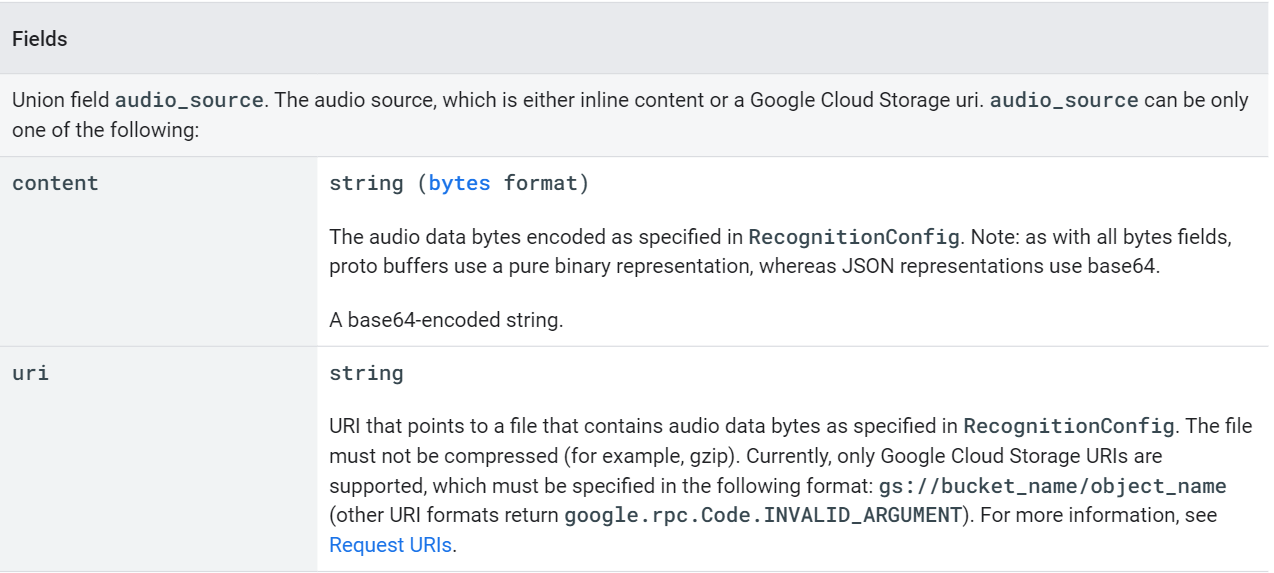

Currently, the only way to access audio data is using **Google Cloud Storage**

In [ ]:
#will get error if you run this cell
gcs_uri_01 = "/content/try01.wav"
audio_01 = speech.RecognitionAudio(uri=gcs_uri_01)

# Detects speech in the audio file
response_01 = client.recognize(config=config, audio=audio_01)

for result in response_01.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))

InvalidArgument: ignored

# 03 Use API for WAV file in GCS



1.   Go to Cloud Storage of your project : https://console.cloud.google.com/storage/browser?orgonly=true&project=myfirstproject-322715&supportedpurview=organizationId&prefix=&forceOnObjectsSortingFiltering=false
2.   Create a Bucket (term for a folder to keep your data)
3. Upload your WAV file into your Bucket
4. Get GCS URI : \<your bucket\>/\<your file path\>
5. Create a new variable to contain your GCS URI : ex. **gcs_uri = "gs://\<your bucket\>/\<your file path\>"**
6. Config sample_rate_hertz to 48000 if you want to work with WAV file


In [ ]:
gcs_uri_02 = "gs://airak-2021/try01.wav"

audio_02 = speech.RecognitionAudio(uri=gcs_uri_02)

config_wav = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=48000,
    language_code="en-US",
)

response_02 = client.recognize(config=config_wav, audio=audio_02)

for result in response_02.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))

Transcript: it's my first time using my record


# 04 Try with Thai speech



1.   Get language_code from https://cloud.google.com/speech-to-text/docs/languages : **th-TH** for Thai

2. Use kora.record for record Thai speech
3. Download and Upload file to your Bucket in GCS
4. Update your **gcs_uri** and **language_code**



In [ ]:
th_record_01 = record.audio(sec=20)
th_record_01

<IPython.core.display.Javascript object>

In [ ]:
th_record_01.save('try02.wav')

'try02.wav'

In [ ]:
gcs_uri_03 = "gs://airak-2021/try02.wav"

audio_03 = speech.RecognitionAudio(uri=gcs_uri_03)

config_wav_th = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=48000,
    language_code="th-TH",
)

response_03 = client.recognize(config=config_wav_th, audio=audio_03)

for result in response_03.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))

Transcript: ชมรมแพทย์ชนบทเผยข้อสั่งการนายกรัฐมนตรีในการประชุมคณะรัฐมนตรีเมื่อ 17 สิงหาคมที่ระบุให้จัดซื้อชุดตรวจแบบ APK ที่ผ่านการรับรองจากอยและองค์การอนามัยโลก
Transcript: ชื่อเป็น


**Original Transcript**

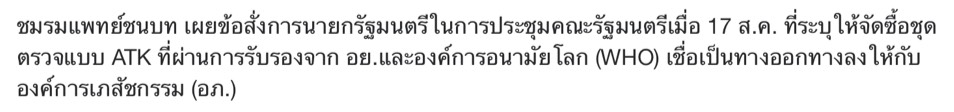

# 05 Asynchronously transcribe a local audio file

Try code from this url with some configuration : https://cloud.google.com/speech-to-text/docs/samples/speech-transcribe-async

In [ ]:
#ไม่ได้ใช้
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

In [ ]:
th_record_02 = record.audio(sec=20)
th_record_02

<IPython.core.display.Javascript object>

In [ ]:
th_record_02.save('try03.wav')

'try03.wav'

In [ ]:
#ไม่ได้ใช้
samplerate, data_th_02 = wavfile.read('/content/try03.wav')

In [ ]:
print(sameplerate)

48000


In [ ]:
def transcribe_file(speech_file):
 
    """
     Note that transcription is limited to a 60 seconds audio file.
     Use a GCS file for audio longer than 1 minute.
    """

    with io.open(speech_file, "rb") as audio_file:
        content = audio_file.read()

    audio = speech.RecognitionAudio(content=content)

    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=48000,
        language_code="th-TH",
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result(timeout=90)

    # Each result is for a consecutive portion of the audio. Iterate through
    # them to get the transcripts for the entire audio file.
    for result in response.results:
        # The first alternative is the most likely one for this portion.
        print(u"Transcript: {}".format(result.alternatives[0].transcript))
        print("Confidence: {}".format(result.alternatives[0].confidence))


In [ ]:
transcribe_file('/content/try03.wav')

Waiting for operation to complete...
Transcript: โรงเรียนของเราน่าอยู่คุณครูใจดีทุกคนเด็กๆก็ไม่ซุกซนพวกเราทุกคนชอบไปโรงเรียนเย้ๆพวกเราชอบไปโรงเรียนประเทศไทยรวมเลือดเนื้อชาติเชื้อไทยเป็นประชารัฐก๋วยเตี๋ยวซาลาเปาส้มโอฟักทองแตงโมมะเฟืองมะไฟ
Confidence: 0.9589725732803345
